In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette('bone')

In [2]:
df = pd.read_csv('PimaDiabetes.csv')
replacements = {0: np.nan}
df_copy = df.copy()
df_copy['SkinThickness'].replace(replacements, inplace=True)
df_copy['Glucose'].replace(replacements, inplace=True)
df_copy['BloodPressure'].replace(replacements, inplace=True)
df_copy['Insulin'].replace(replacements, inplace=True)
df_copy['BMI'].replace(replacements, inplace=True)

info=pd.DataFrame((df_copy.isna().sum())/len(df_copy)*100).T.rename(index={0:'Null values (%)'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values (%),0.0,0.666667,4.666667,29.466667,48.266667,1.466667,0.0,0.0,0.0


In [3]:
df = df_copy.drop(['Insulin', 'SkinThickness'], axis=1)
info=pd.DataFrame((df.isna().sum())/len(df)*100).T.rename(index={0:'Null values (%)'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values (%),0.0,0.666667,4.666667,1.466667,0.0,0.0,0.0


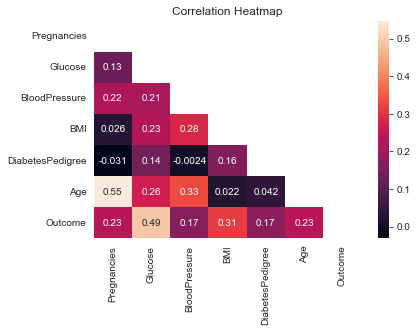

In [4]:
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
ax = sns.heatmap(df.corr(), annot=True, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
for i in df.columns:
    for j in (0,1):
        df.loc[(df['Outcome'] == j) & (df[i].isnull()), i] = df.loc[(df['Outcome'] == j ), i].mean()

info=pd.DataFrame(df.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0


In [6]:
def get_num_outliers (df,column):
    q1 = df[column].quantile(0.25)
    q3 =  df[column].quantile(0.75)
    iqr = q3-q1
    return sum(( df[column]< (q1-1.5*iqr)) | ( df[column]>q3+(1.5*iqr)))
    
outliers = []
for col in df.columns:
    outliers.append(get_num_outliers(df,col))
pd.DataFrame(list(zip(df.columns, outliers))).sort_values(1,ascending=True)

,0,1
1,Glucose,0
6,Outcome,0
0,Pregnancies,4
3,BMI,8
5,Age,12
2,BloodPressure,14
4,DiabetesPedigree,29


In [7]:
def delete_outliers(col,df):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
    new_df = df[(df[col] < upper) & (df[col] > lower)]
    return new_df

In [8]:
def create_box_hist(df, x, hue):
    variable = df[x].values
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)}, figsize=(7,9))
    
    mean = df[x].mean()
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.5)
    q3 = df[x].quantile(0.75)
    
    sns.boxplot(data=df, x=variable, ax=ax_box)
    ax_box.axvline(mean, color='orange', linestyle='-', linewidth=2)
    ax_box.axvline(q1, color='black', linestyle='--')
    ax_box.axvline(q2, color='#003060', linestyle='--')
    ax_box.axvline(q3, color='grey', linestyle='--')
    
    sns.histplot(data=df, x=x, kde=True, hue=hue)
    ax_hist.axvline(mean, color='orange', linestyle='-', label='Mean')
    ax_hist.axvline(q1, color='black', linestyle='--', label='Q1')
    ax_hist.axvline(q2, color='#003060', linestyle='--', label='Q2')
    ax_hist.axvline(q3, color='grey', linestyle='--', label='Q3')
    
    ax_hist.legend()

    plt.show()

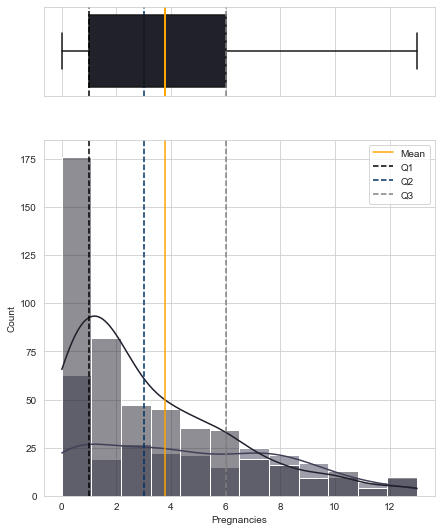

In [9]:
df_temp = delete_outliers('Pregnancies', df)
create_box_hist(df_temp,'Pregnancies', 'Outcome')

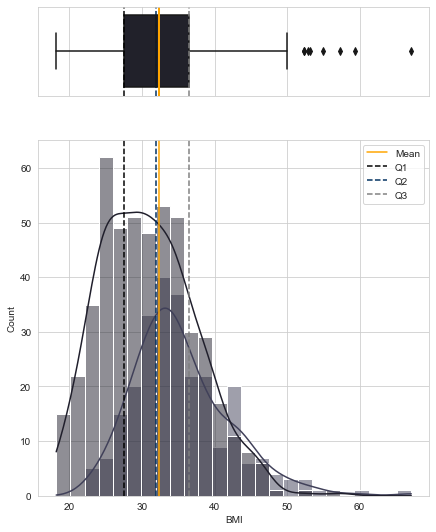

In [10]:
create_box_hist(df_temp,'BMI', 'Outcome')

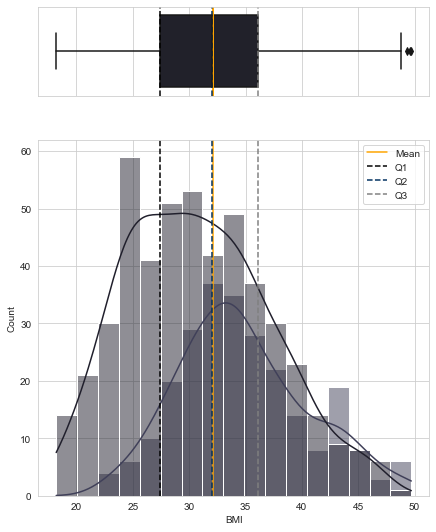

In [11]:
df_temp = delete_outliers('BMI', df_temp)
df_temp
create_box_hist(df_temp,'BMI', 'Outcome')

In [12]:
df_temp = delete_outliers('Age', df_temp)
df_temp

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...
745,12.0,100.0,84.0,30.0,0.488,46.0,0
746,1.0,147.0,94.0,49.3,0.358,27.0,1
747,1.0,81.0,74.0,46.3,1.096,32.0,0
748,3.0,187.0,70.0,36.4,0.408,36.0,1


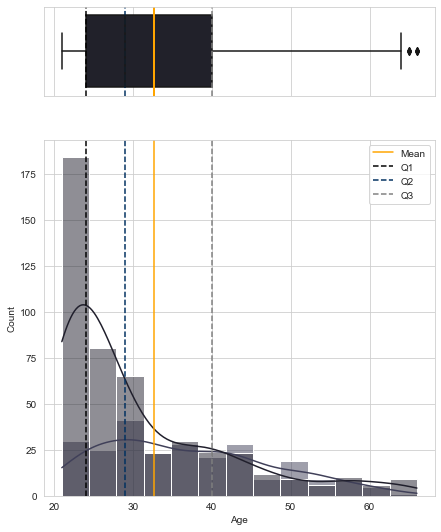

In [13]:
create_box_hist(df_temp,'Age', 'Outcome')

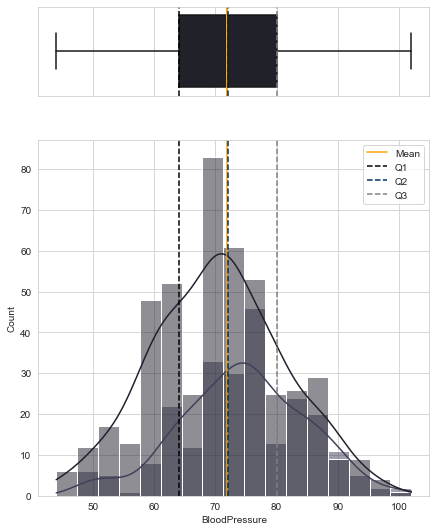

In [14]:
df_temp = delete_outliers('BloodPressure', df_temp)
create_box_hist(df_temp,'BloodPressure', 'Outcome')

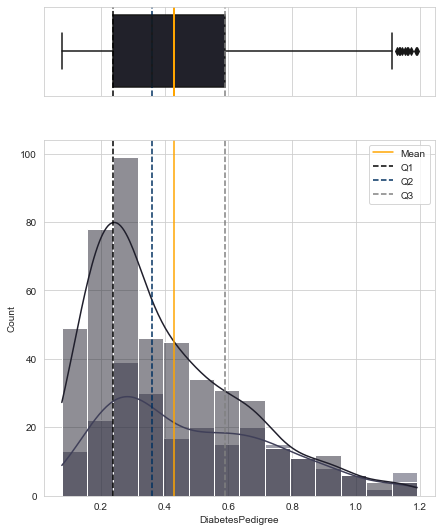

In [15]:
df_temp = delete_outliers('DiabetesPedigree', df_temp)
create_box_hist(df_temp,'DiabetesPedigree', 'Outcome')

In [16]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#X = df_temp.drop(columns="Outcome")
#y = df_temp["Outcome"]
X = df.drop(columns="Outcome")
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
#stdscl = StandardScaler()
#stdscl.fit(X)
#X_train = stdscl.transform(X_train)
#X_test = stdscl.transform(X_test)

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
acc = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.800


In [17]:
yhat = lr.predict(X_train)
acc = accuracy_score(y_train, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.766


In [18]:
print("Intercept: ", lr.intercept_)
print("Coefficients:", list(zip(X_train.columns, lr.coef_[0])))

Intercept:  [-8.68829359]
Coefficients: [('Pregnancies', 0.11673849779787775), ('Glucose', 0.03506071713042067), ('BloodPressure', -0.005905335872748376), ('BMI', 0.09058964302262991), ('DiabetesPedigree', 0.5690654354040718), ('Age', 0.010309955724877749)]


In [19]:
lr.coef_

array([[ 0.1167385 ,  0.03506072, -0.00590534,  0.09058964,  0.56906544,
         0.01030996]])

In [20]:
preds = pd.read_csv("ToPredict.csv").drop(['Insulin', 'SkinThickness'], axis=1)
#preds_ = stdscl.transform(preds)
pred = lr.predict(preds)
print(pred)

[0 0 0 1 1]


In [21]:
preds

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,4,136,70,31.2,1.182,22
1,1,121,78,39.0,0.261,28
2,3,108,62,26.0,0.223,25
3,0,181,88,43.3,0.222,26
4,8,154,78,32.4,0.443,45


In [22]:
preds.loc[0]

Pregnancies           4.000
Glucose             136.000
BloodPressure        70.000
BMI                  31.200
DiabetesPedigree      1.182
Age                  22.000
Name: 0, dtype: float64

In [23]:
a = lr.intercept_
b = lr.coef_[0][0]
c = lr.coef_[0][1]
d = lr.coef_[0][2]
e = lr.coef_[0][3]
f = lr.coef_[0][4]
g = lr.coef_[0][5]

In [24]:
import math
p = (math.exp(a+(b*preds.loc[0][0])+(c*preds.loc[0][1])+(d*preds.loc[0][2])+
(e*preds.loc[0][3])+(f*preds.loc[0][4])+(g*(preds.loc[0][5]))))/(1+(math.exp(a+(b*preds.loc[0][0])+
(c*preds.loc[0][1])+(d*preds.loc[0][2])+(e*preds.loc[0][3])+(f*preds.loc[0][4])+(g*(preds.loc[0][5])))))
print(p)

0.46490670799795775


##### ===========================

In [25]:
df = pd.read_csv('PimaDiabetes.csv')
replacements = {0: np.nan}
df_copy = df.copy()
df_copy['SkinThickness'].replace(replacements, inplace=True)
df_copy['Glucose'].replace(replacements, inplace=True)
df_copy['BloodPressure'].replace(replacements, inplace=True)
df_copy['Insulin'].replace(replacements, inplace=True)
df_copy['BMI'].replace(replacements, inplace=True)

info=pd.DataFrame((df_copy.isna().sum())/len(df_copy)*100).T.rename(index={0:'Null values (%)'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values (%),0.0,0.666667,4.666667,29.466667,48.266667,1.466667,0.0,0.0,0.0


In [26]:
for i in df.columns:
    for j in (0,1):
        df.loc[(df['Outcome'] == j) & (df[i].isnull()), i] = df.loc[(df['Outcome'] == j ), i].mean()

info=pd.DataFrame(df.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0,0,0


In [27]:
newdf = df
newdf['Glucose_cat'] = pd.cut(newdf['Glucose'], bins = [-1,40,80,120,160,np.inf], labels=[1,2,3,4,5])
newdf['Glucose_cat'].value_counts()

3    366
4    239
5     98
2     42
1      5
Name: Glucose_cat, dtype: int64

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(newdf, newdf["Glucose_cat"]):
    strat_train_set = newdf.loc[train_index]
    strat_test_set = newdf.loc[test_index]
def get_glucose_proportions(ndf):
    print(ndf["Glucose_cat"].value_counts() / len(ndf))

print("Entire Dataset: ")
get_glucose_proportions(newdf)
print("\n")
print("-"*30)
print("\nTesting set: ")
get_glucose_proportions(strat_test_set)

Entire Dataset: 
3    0.488000
4    0.318667
5    0.130667
2    0.056000
1    0.006667
Name: Glucose_cat, dtype: float64


------------------------------

Testing set: 
3    0.486667
4    0.320000
5    0.133333
2    0.053333
1    0.006667
Name: Glucose_cat, dtype: float64


In [29]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=["Glucose_cat"], inplace=True)

X_train = strat_train_set.drop(columns=["Outcome"])
y_train = strat_train_set["Outcome"]

X_test = strat_test_set.drop(columns=["Outcome"])
y_test = strat_test_set["Outcome"]

Selected best 1:
['Insulin']
0.64
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        99
           1       0.29      0.04      0.07        51

    accuracy                           0.64       150
   macro avg       0.47      0.49      0.42       150
weighted avg       0.53      0.64      0.54       150



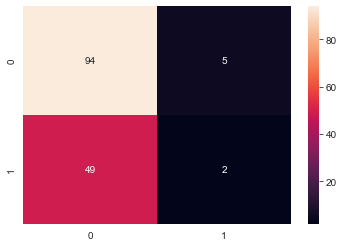

Selected best 2:
['Glucose' 'Insulin']
0.7533333333333333
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.68      0.53      0.59        51

    accuracy                           0.75       150
   macro avg       0.73      0.70      0.71       150
weighted avg       0.75      0.75      0.74       150



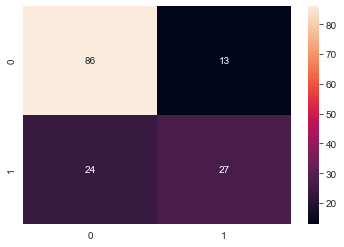

Selected best 3:
['Glucose' 'Insulin' 'Age']
0.74
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.65      0.51      0.57        51

    accuracy                           0.74       150
   macro avg       0.71      0.68      0.69       150
weighted avg       0.73      0.74      0.73       150



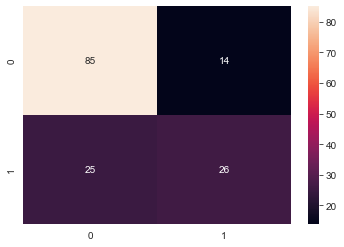

Selected best 4:
['Glucose' 'Insulin' 'BMI' 'Age']
0.7933333333333333
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.72      0.65      0.68        51

    accuracy                           0.79       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.79      0.79      0.79       150



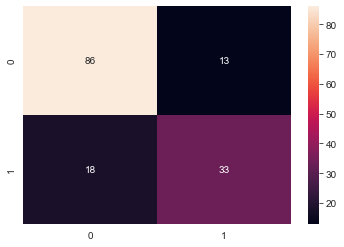

Selected best 5:
['Pregnancies' 'Glucose' 'Insulin' 'BMI' 'Age']
0.76
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.65      0.63      0.64        51

    accuracy                           0.76       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.76      0.76      0.76       150



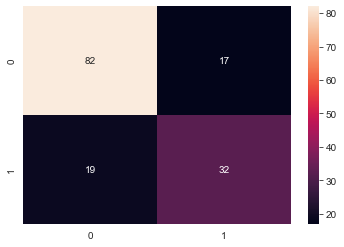

Selected best 6:
['Pregnancies' 'Glucose' 'SkinThickness' 'Insulin' 'BMI' 'Age']
0.76
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.65      0.63      0.64        51

    accuracy                           0.76       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.76      0.76      0.76       150



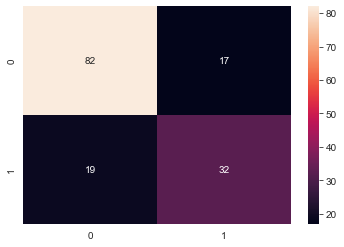

Selected best 7:
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'Age']
0.7666666666666667
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.67      0.63      0.65        51

    accuracy                           0.77       150
   macro avg       0.74      0.73      0.74       150
weighted avg       0.76      0.77      0.76       150



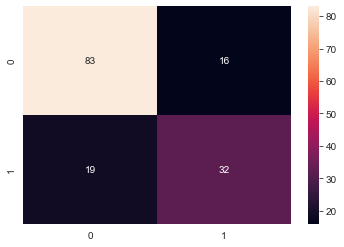

Selected best 8:
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigree' 'Age']
0.78
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.69      0.65      0.67        51

    accuracy                           0.78       150
   macro avg       0.76      0.75      0.75       150
weighted avg       0.78      0.78      0.78       150



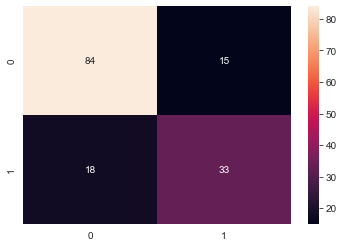

[  91.942 1109.588   14.732   80.529 2705.13   101.076    3.932  148.955]


In [30]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.metrics import confusion_matrix, classification_report

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(X_train.columns)+1):
    #print(i)
    test = SelectKBest(score_func=chi2, k=i)
    fit = test.fit(X_train, y_train)
    set_printoptions(precision=3)
    features = fit.transform(X_train)

    fea = np.array(X_train.columns)
    filter = test.get_support()
    print("Selected best {}:".format(i))
    print(fea[filter])

    #print(features)
    lr = LogisticRegression().fit(features, y_train)
    pred_x = fit.transform(X_test)
    #print(pred_x)
    hat_y = lr.predict(pred_x)
    yhat = lr.predict(features)
    acc_lr = accuracy_score(hat_y, y_test)
    print(acc_lr)
    sns.heatmap(confusion_matrix(y_test, hat_y), annot=True)
    accs_lr = accuracy_score(yhat, y_train)
    test_accs.append(acc_lr)    
    train_accs.append(accs_lr)
    print(classification_report(y_test, hat_y))
    plt.show()

print(fit.scores_)

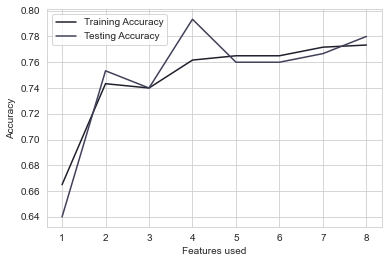

In [31]:
x_axs2 = np.arange(1,len(X_train.columns)+1) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Features used') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [32]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
display(featureScores.nlargest(8,'Score'))

,Specs,Score
4,Insulin,2705.130209
1,Glucose,1109.587847
7,Age,148.954759
5,BMI,101.076057
0,Pregnancies,91.942343
3,SkinThickness,80.528642
2,BloodPressure,14.731648
6,DiabetesPedigree,3.931560


In [33]:
strat_train_set = strat_train_set.drop(['Insulin', 'SkinThickness'], axis=1)
strat_test_set = strat_test_set.drop(['Insulin', 'SkinThickness'], axis=1)

In [34]:
replacements = {0: np.nan}
strat_train_set_ = strat_train_set.copy()
cols = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigree', 'Age']
for col in cols:
    strat_train_set_[col].replace(replacements, inplace=True)

info=pd.DataFrame(strat_train_set_.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,4,31,11,0,0,0


In [35]:
for i in strat_train_set_.columns:
    for j in (0,1):
        strat_train_set_.loc[(strat_train_set_['Outcome'] == j) & (strat_train_set_[i].isnull()), i] = strat_train_set_.loc[(strat_train_set_['Outcome'] == j ), i].median()

info=pd.DataFrame(strat_train_set_.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0


In [36]:
def delete_outliers(col,df):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
    new_df = df[(df[col] < upper) & (df[col] > lower)]
    return new_df

In [37]:
def get_num_outliers (df,column):
    q1 = df[column].quantile(0.25)
    q3 =  df[column].quantile(0.75)
    iqr = q3-q1
    return sum(( df[column]< (q1-1.5*iqr)) | ( df[column]>q3+(1.5*iqr)))
    
outliers = []
for col in strat_train_set_.columns:
    outliers.append(get_num_outliers(strat_train_set_,col))
pd.DataFrame(list(zip(strat_train_set_.columns, outliers))).sort_values(1,ascending=True)

,0,1
6,Outcome,0
1,Glucose,1
0,Pregnancies,4
5,Age,9
2,BloodPressure,10
3,BMI,10
4,DiabetesPedigree,25


In [38]:
df_glu = delete_outliers('Glucose', strat_train_set_)
df_preg = delete_outliers('Pregnancies', df_glu)
df_age = delete_outliers('Age', df_preg)
df_BP = delete_outliers('BloodPressure', df_age)
df_bmi = delete_outliers('BMI', df_BP)
strat_train_set_ = delete_outliers('DiabetesPedigree', df_bmi)
strat_train_set_
#create_box_hist(df_glu, 'Glucose', 'Outcome')

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
482,4.0,85.0,58.0,27.80,0.306,28.0,0
143,10.0,108.0,66.0,32.40,0.272,42.0,1
720,4.0,83.0,86.0,29.30,0.317,34.0,0
412,1.0,143.0,84.0,42.40,1.076,22.0,0
660,10.0,162.0,84.0,27.70,0.182,54.0,0
...,...,...,...,...,...,...,...
115,4.0,146.0,92.0,31.20,0.539,61.0,1
49,7.0,105.0,70.0,29.85,0.305,24.0,0
587,6.0,103.0,66.0,24.30,0.249,29.0,0
387,8.0,105.0,100.0,43.30,0.239,45.0,1


In [39]:
from sklearn.feature_selection import RFE

X_train = strat_train_set_.drop(columns="Outcome")
y_train = strat_train_set_["Outcome"]

X_test = strat_test_set.drop(columns="Outcome")
y_test = strat_test_set["Outcome"]

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
acc = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.753


In [40]:
dicti = {'Intercept': lr.intercept_[0]}
for i in range(0,len(X_train.columns)):
    for j in range(0,len(lr.coef_[0])):
        if i == j:
            dicti[X_train.columns[i]] = [lr.coef_[0][j]]
info = pd.DataFrame(dicti)
info

,Intercept,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,-9.579839,0.132963,0.040345,-0.013442,0.087081,1.149819,0.030028


In [41]:
preds = pd.read_csv("ToPredict.csv")
preds = preds.drop(['Insulin', 'SkinThickness'], axis = 1)
display(preds)

a = lr.intercept_
b = lr.coef_[0][0]
c = lr.coef_[0][1]
d = lr.coef_[0][2]
e = lr.coef_[0][3]
f = lr.coef_[0][4]
g = lr.coef_[0][5]
import math
p = (math.exp(a+(b*preds.loc[0][0])+(c*preds.loc[0][1])+(d*preds.loc[0][2])+
(e*preds.loc[0][3])+(f*preds.loc[0][4])+(g*(preds.loc[0][5]))))/(1+(math.exp(a+(b*preds.loc[0][0])+
(c*preds.loc[0][1])+(d*preds.loc[0][2])+(e*preds.loc[0][3])+(f*preds.loc[0][4])+(g*(preds.loc[0][5])))))
print(p)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,4,136,70,31.2,1.182,22
1,1,121,78,39.0,0.261,28
2,3,108,62,26.0,0.223,25
3,0,181,88,43.3,0.222,26
4,8,154,78,32.4,0.443,45


0.5583941784586841


In [42]:
ypreds_lr = lr.predict(preds)
print(ypreds_lr)

[1 0 0 1 1]


In [43]:
print(lr.predict_proba(preds))

[[0.442 0.558]
 [0.746 0.254]
 [0.916 0.084]
 [0.206 0.794]
 [0.209 0.791]]


In [44]:
preds['Predicted Outcome'] = lr.predict(preds)
preds

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Predicted Outcome
0,4,136,70,31.2,1.182,22,1
1,1,121,78,39.0,0.261,28,0
2,3,108,62,26.0,0.223,25,0
3,0,181,88,43.3,0.222,26,1
4,8,154,78,32.4,0.443,45,1


Selected best 1:
['Glucose']
0.7266666666666667
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.61      0.53      0.57        51

    accuracy                           0.73       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.72      0.73      0.72       150



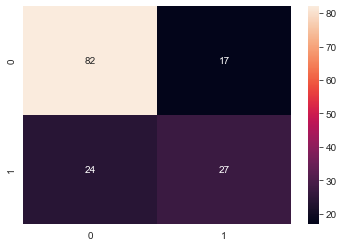

Selected best 2:
['Glucose' 'Age']
0.7466666666666667
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.64      0.57      0.60        51

    accuracy                           0.75       150
   macro avg       0.72      0.70      0.71       150
weighted avg       0.74      0.75      0.74       150



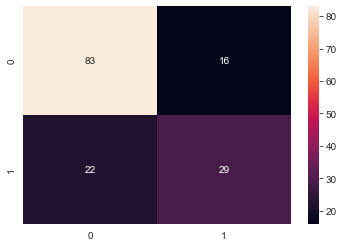

Selected best 3:
['Pregnancies' 'Glucose' 'Age']
0.74
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.62      0.59      0.61        51

    accuracy                           0.74       150
   macro avg       0.71      0.70      0.71       150
weighted avg       0.74      0.74      0.74       150



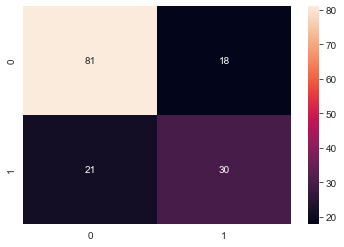

Selected best 4:
['Pregnancies' 'Glucose' 'BMI' 'Age']
0.76
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.65      0.65      0.65        51

    accuracy                           0.76       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.76      0.76      0.76       150



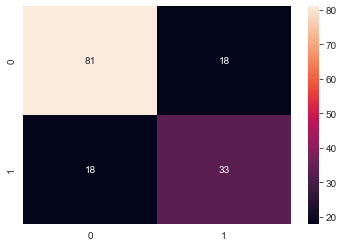

Selected best 5:
['Pregnancies' 'Glucose' 'BloodPressure' 'BMI' 'Age']
0.7666666666666667
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.65      0.67      0.66        51

    accuracy                           0.77       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.77      0.77      0.77       150



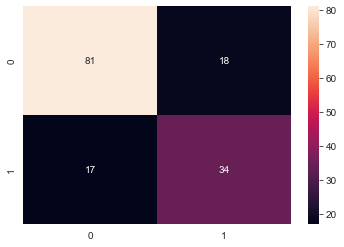

Selected best 6:
['Pregnancies' 'Glucose' 'BloodPressure' 'BMI' 'DiabetesPedigree' 'Age']
0.7533333333333333
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.63      0.67      0.65        51

    accuracy                           0.75       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.76      0.75      0.75       150



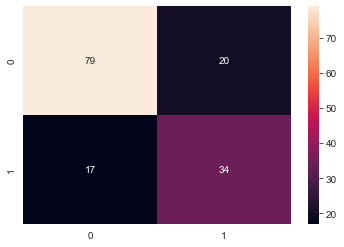

[  88.335 1001.242   17.899   44.166    2.216  192.631]


In [45]:
train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(X_train.columns)+1):
    #print(i)
    test = SelectKBest(score_func=chi2, k=i)
    fit = test.fit(X_train, y_train)
    set_printoptions(precision=3)
    features = fit.transform(X_train)

    fea = np.array(X_train.columns)
    filter = test.get_support()
    print("Selected best {}:".format(i))
    print(fea[filter])

    #print(features)
    lr = LogisticRegression().fit(features, y_train)
    pred_x = fit.transform(X_test)
    #print(pred_x)
    hat_y = lr.predict(pred_x)
    yhat = lr.predict(features)
    acc_lr = accuracy_score(hat_y, y_test)
    print(acc_lr)
    sns.heatmap(confusion_matrix(y_test, hat_y), annot=True)
    accs_lr = accuracy_score(yhat, y_train)
    test_accs.append(acc_lr)    
    train_accs.append(accs_lr)
    print(classification_report(y_test, hat_y))
    plt.show()

print(fit.scores_)

In [46]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
display(featureScores.nlargest(8,'Score'))

,Specs,Score
1,Glucose,1001.241934
5,Age,192.631036
0,Pregnancies,88.335317
3,BMI,44.165514
2,BloodPressure,17.899156
4,DiabetesPedigree,2.215550


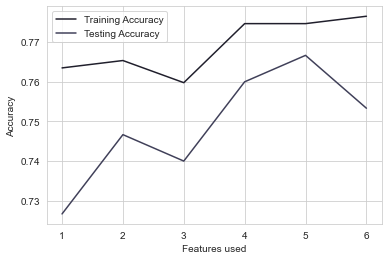

In [47]:
x_axs2 = np.arange(1,len(X_train.columns)+1) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Features used') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [48]:
#X_train_ = strat_train_set_.drop(columns=["Outcome", "Pregnancies", "BloodPressure", "DiabetesPedigree"])
#y_train = strat_train_set_["Outcome"]

#X_test_ = strat_test_set.drop(columns=["Outcome", "Pregnancies", "SkinThickness", "Insulin", "BloodPressure", "DiabetesPedigree"])
#y_test = strat_test_set["Outcome"]

In [49]:
#lr2 = lr.fit(X_train_, y_train)
#yhat = lr2.predict(X_test_)
#acc = accuracy_score(y_test, yhat)

#print('Accuracy: %.3f' % acc)

In [50]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_train, y_train)
set_printoptions(precision=3)
features = fit.transform(X_train)

fea = np.array(X_train.columns)
filter = test.get_support()
print("Selected best 5:")
print(fea[filter])

lr = LogisticRegression().fit(features, y_train)
pred_x = fit.transform(X_test)
#print(pred_x)
hat_y = lr.predict(pred_x)
acc_lr = accuracy_score(hat_y, y_test)

Selected best 5:
['Pregnancies' 'Glucose' 'BloodPressure' 'BMI' 'Age']


In [51]:
X_train2 = X_train.drop(['DiabetesPedigree'],axis=1)

In [52]:
acc_lr

0.7666666666666667

In [53]:
dicti = {'Intercept': lr.intercept_[0]}
for i in range(0,len(X_train2.columns)):
    for j in range(0,len(lr.coef_[0])):
        if i == j:
            dicti[X_train2.columns[i]] = [lr.coef_[0][j]]
info = pd.DataFrame(dicti)
info

,Intercept,Pregnancies,Glucose,BloodPressure,BMI,Age
0,-9.232182,0.127546,0.040208,-0.01342,0.092291,0.030519


In [54]:
preds

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Predicted Outcome
0,4,136,70,31.2,1.182,22,1
1,1,121,78,39.0,0.261,28,0
2,3,108,62,26.0,0.223,25,0
3,0,181,88,43.3,0.222,26,1
4,8,154,78,32.4,0.443,45,1


In [55]:
preds2 = preds.drop(columns=['Predicted Outcome', 'DiabetesPedigree'])
pred2 = lr.predict(preds2)

In [56]:
pred2

array([0, 0, 0, 1, 1], dtype=int64)

In [57]:
print(lr.predict_proba(preds2))

[[0.655 0.345]
 [0.697 0.303]
 [0.898 0.102]
 [0.161 0.839]
 [0.215 0.785]]


In [58]:
preds2['Predicted Outcome'] = lr.predict(preds2)
preds2

,Pregnancies,Glucose,BloodPressure,BMI,Age,Predicted Outcome
0,4,136,70,31.2,22,0
1,1,121,78,39.0,28,0
2,3,108,62,26.0,25,0
3,0,181,88,43.3,26,1
4,8,154,78,32.4,45,1


In [59]:
math.exp(-9.232182 + (0.123546*1)+(0.040208*121)+(-0.01342*78)+(0.092291*39)+(0.030519*28))/(1+(math.exp(-9.232182 + (0.123546*1)+(0.040208*121)+(-0.01342*78)+(0.092291*39)+(0.030519*28))))

0.30230470535071774